# 데이터 불러오기부터

### 가. 라이브러리 Import

In [1]:
import pandas as pd
import numpy as np

#### [참고] AIDU에서 필요한 추가 라이브러리 Import : 아래 코드는 AIDU에서만 실행 가능합니다.

In [2]:
# from aicentro.session import Session
# from aicentro.framework.tensorflow import Tensorflow as AiduFrm

### 나. 데이터 불러오기

### 만약에 Train/Evaluation 데이터를 따로 전처리 한다면?
* 전처리 기준(특히 정규화 작업 시)이 달라져서 모델의 성능에 악영향을 줄 수 있음

In [3]:
df = pd.read_csv("onenavi_train.csv",sep="|")
df_eval = pd.read_csv("onenavi_evaluation.csv",sep="|")
df # 데이터 프레임 확인하기

,RID,TIME_DEPARTUREDATE,TIME_ARRIVEDATE,A_DISTANCE,ET,ETA,ETAA
0,router-84875df7fc-b5nxc-7-20255166-0,2020-07-20 05:35:21.000,2020-07-20 05:55:22.599,12914.0,1201.534058,987.624634,82.196974
1,router-84875df7fc-b5nxc-6-10888379-0,2020-07-20 05:55:22.000,2020-07-20 06:09:06.941,7483.0,823.817017,855.933716,96.101477
2,router-84875df7fc-cmkz9-7-45806143-0,2020-07-20 00:13:46.000,2020-07-20 00:22:32.909,8087.0,526.710999,575.954529,90.650750
3,router-84875df7fc-scxcj-7-47843617-0,2020-07-20 00:13:43.000,2020-07-20 00:28:42.729,10528.0,898.581970,537.117004,59.773846
4,router-84875df7fc-scxcj-3-20061505-0,2020-07-20 00:01:57.000,2020-07-20 00:17:58.169,10636.0,957.758972,786.352539,82.103385
...,...,...,...,...,...,...,...
55895,router-84875df7fc-8n4sw-2-7745536-0,2020-07-24 23:57:07.000,2020-07-25 00:06:15.697,4448.0,544.301025,550.907715,98.786207
55896,router-84875df7fc-scxcj-1-6043477-0,2020-07-24 23:57:26.000,2020-07-25 00:07:15.291,3106.0,535.666992,459.554443,85.791070
55897,router-84875df7fc-b5nxc-6-13399736-0,2020-07-24 23:57:46.000,2020-07-25 00:07:56.841,10325.0,610.799988,791.658936,70.389825
55898,router-84875df7fc-cmkz9-7-56753908-0,2020-07-24 23:58:03.000,2020-07-25 00:12:42.402,4458.0,878.479004,516.855774,58.835302


In [4]:
# 학습/평가 데이터의 전처리 기준을 통일하기위해 데이터 합본
df_total=pd.concat([df,df_eval],ignore_index=True)

#### [참고] AIDU에서는 파일을 불러올 때 아래 예시를 참고 : 아래 코드는 AIDU에서만 실행 가능합니다.

In [5]:
# # 데이터 셋 로딩
# aicentro_session = Session(verify = False)
# aidu_framework = AiduFrm(session = aicentro_session)
# df = pd.read_csv(aidu_framework.config.data_dir + "/onenavi_train.csv", sep = "|")
# df_eval = pd.read_csv(aidu_framework.config.data_dir + "/onenavi_evaluation.csv", sep = "|")
# # 학습/평가 데이터의 전처리 기준을 통일하기위해 데이터 합본
# df_total=pd.concat([df,df_eval],ignore_index=True)

# 1. 이상치/결측치 처리
## Trash를 판별하는 능력은 좋은 AI모델을 만드는 데 있어 핵심입니다.
+ KeyPoint : 데이터의 형태를 살펴보고 불필요한 데이터를 정제할 수 있다.

[참고] 공식 Document
+ fillna(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)
+ dropna(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)

### 가. 결측치 처리

In [6]:
# 결측치 수 확인하기
df_total.isnull().sum()

RID                   0
TIME_DEPARTUREDATE    0
TIME_ARRIVEDATE       0
A_DISTANCE            0
ET                    0
ETA                   0
ETAA                  0
dtype: int64

##### 우리의 학습 데이터에는 결측치가 없습니다. 원활한 실습을 위해 샘플데이터를 만들어보겠습니다.

In [7]:
# 샘플테이블 생성
sample = pd.DataFrame(
        {
            'column1':[50,70,np.nan,55],
            'column2':[22,50,66,np.nan]
        })
sample

,column1,column2
0,50.0,22.0
1,70.0,50.0
2,NaN,66.0
3,55.0,NaN


In [8]:
# dropna : 제거하기
sample.dropna()

,column1,column2
0,50.0,22.0
1,70.0,50.0


In [9]:
# fillna(number) : number로 채우기 
sample.fillna(0)

,column1,column2
0,50.0,22.0
1,70.0,50.0
2,0.0,66.0
3,55.0,0.0


In [10]:
# fillna(method) : 다양한 방법으로 채우기 
# 'backfill'/'bfill': 바로 뒤에 값으로 채우기, 'pad'/'ffill': 바로 앞의 값으로 채우기
sample.fillna(method='pad')

,column1,column2
0,50.0,22.0
1,70.0,50.0
2,70.0,66.0
3,55.0,66.0


### 나. 이상치 처리
#### 이상치(Outlier)는 전적으로 연구자 혹은 개발자가 판단을 해야한다. 자세히 살펴보지않으면 놓치기 쉽상이다.
#### "자세히 보아야 드러난다. 오래 보아야 도움이 된다. Outlier가 그렇다."

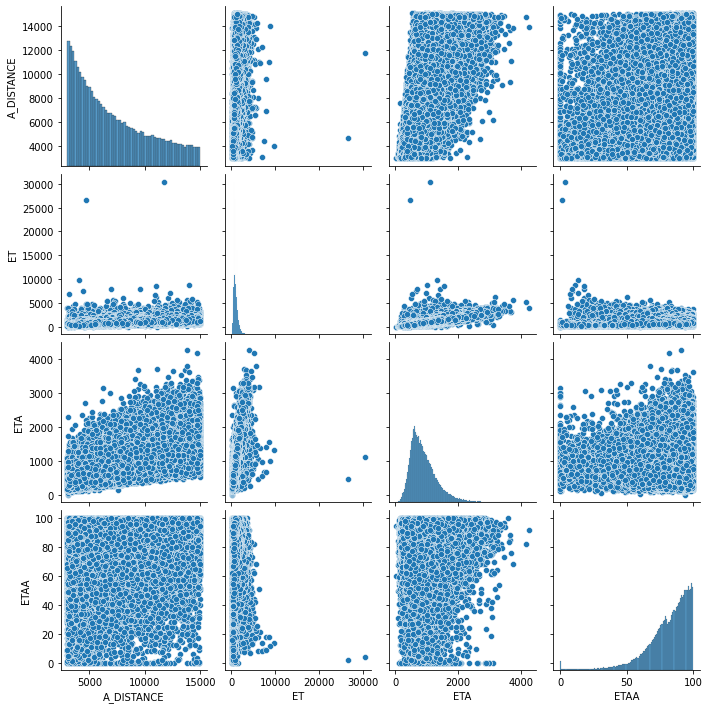

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df_total)
plt.show()

In [12]:
# ET의 분포에서 특이한 점이 있습니다. 약 2만 이상에서 몇개 안보이는 특이치가 있는데요.
#1.5만 이상으로 숫자을 확인해보겠습니다.(1.5만초면 250분)
df_total[df_total['ET']>15000] # 2개

,RID,TIME_DEPARTUREDATE,TIME_ARRIVEDATE,A_DISTANCE,ET,ETA,ETAA
59,router-84875df7fc-scxcj-7-47870189-0,2020-07-20 01:12:04.000,2020-07-20 08:36:03.186,4676.0,26627.664062,461.458649,1.733005
17499,router-84875df7fc-b5nxc-4-53419779-0,2020-07-22 07:25:59.000,2020-07-22 15:53:43.051,11748.0,30463.843750,1114.537109,3.658557


In [13]:
# Outlier 제거 후 데이터만 남기기
df_total=df_total[df_total['ET']<=15000]
df_total

,RID,TIME_DEPARTUREDATE,TIME_ARRIVEDATE,A_DISTANCE,ET,ETA,ETAA
0,router-84875df7fc-b5nxc-7-20255166-0,2020-07-20 05:35:21.000,2020-07-20 05:55:22.599,12914.0,1201.534058,987.624634,82.196974
1,router-84875df7fc-b5nxc-6-10888379-0,2020-07-20 05:55:22.000,2020-07-20 06:09:06.941,7483.0,823.817017,855.933716,96.101477
2,router-84875df7fc-cmkz9-7-45806143-0,2020-07-20 00:13:46.000,2020-07-20 00:22:32.909,8087.0,526.710999,575.954529,90.650750
3,router-84875df7fc-scxcj-7-47843617-0,2020-07-20 00:13:43.000,2020-07-20 00:28:42.729,10528.0,898.581970,537.117004,59.773846
4,router-84875df7fc-scxcj-3-20061505-0,2020-07-20 00:01:57.000,2020-07-20 00:17:58.169,10636.0,957.758972,786.352539,82.103385
...,...,...,...,...,...,...,...
109637,router-84875df7fc-b5nxc-0-6856031-0,2020-07-31 11:09:24.000,2020-07-31 11:15:59.833,4457.0,393.873993,633.093689,39.264917
109638,router-84875df7fc-cmkz9-7-71080475-0,2020-07-31 11:09:25.000,2020-07-31 11:17:26.427,5518.0,478.945007,377.083557,78.732120
109639,router-84875df7fc-cmkz9-7-71082304-0,2020-07-31 11:10:04.000,2020-07-31 11:14:01.092,4025.0,223.481995,412.308411,15.507101
109640,router-84875df7fc-b5nxc-4-75603454-0,2020-07-31 11:11:46.000,2020-07-31 11:17:47.095,3372.0,360.329010,580.275146,38.959637


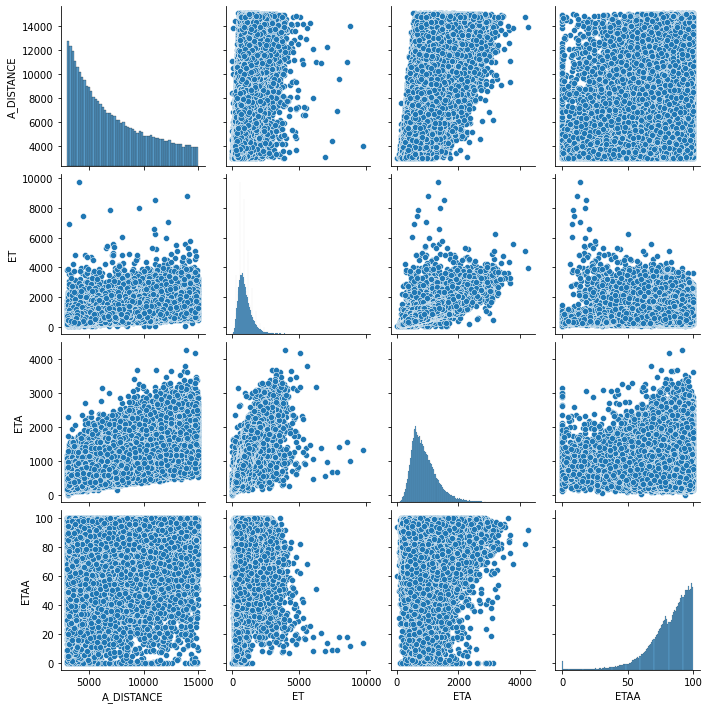

In [14]:
# 다시 한 번 확인해 보겠습니다.

sns.pairplot(df_total)
plt.show()

#### 여기서 Tip!
#### 눈에 보이는 것만 가지고 판단하실껀가요?
#### 숨겨진 변수가 있지 않을까요?
#### 평균 시속을 기준으로 분포를 보도록 하겠습니다.

In [15]:
# 평균시속 변수 만들기 : 속도는 거리 나누기 시간
df_total['PerHour']=(df_total['A_DISTANCE']/1000)/(df_total['ET']/3600)

In [16]:
# 데이터 분포 확인하기
df_total.describe()

,A_DISTANCE,ET,ETA,ETAA,PerHour
count,109640.000000,109640.000000,109640.000000,109640.000000,109640.000000
mean,7082.200100,967.710240,891.528361,81.174978,30.167191
std,3268.827798,507.371299,411.463193,16.176444,23.960059
min,3000.000000,7.113000,9.585180,0.000000,1.491505
25%,4302.000000,600.456726,593.542648,73.615396,19.803600
50%,6223.000000,881.533508,809.789856,85.038288,26.726291
75%,9359.000000,1200.538971,1109.784851,93.244905,36.520734
max,15000.000000,9782.602539,4264.188965,99.999899,3574.445236


#### 시속이 3500키로?! 이상합니다.

In [17]:
# 시속 130이상 데이터 수 확인하기 : 몇 개 되지 않으면 제거하자!
len(df_total[df_total['PerHour']>130])

60

In [18]:
# Outlier 제거 후 데이터만 남기기
df_total=df_total[df_total['PerHour']<=130]
df_total

,RID,TIME_DEPARTUREDATE,TIME_ARRIVEDATE,A_DISTANCE,ET,ETA,ETAA,PerHour
0,router-84875df7fc-b5nxc-7-20255166-0,2020-07-20 05:35:21.000,2020-07-20 05:55:22.599,12914.0,1201.534058,987.624634,82.196974,38.692536
1,router-84875df7fc-b5nxc-6-10888379-0,2020-07-20 05:55:22.000,2020-07-20 06:09:06.941,7483.0,823.817017,855.933716,96.101477,32.699980
2,router-84875df7fc-cmkz9-7-45806143-0,2020-07-20 00:13:46.000,2020-07-20 00:22:32.909,8087.0,526.710999,575.954529,90.650750,55.273575
3,router-84875df7fc-scxcj-7-47843617-0,2020-07-20 00:13:43.000,2020-07-20 00:28:42.729,10528.0,898.581970,537.117004,59.773846,42.178456
4,router-84875df7fc-scxcj-3-20061505-0,2020-07-20 00:01:57.000,2020-07-20 00:17:58.169,10636.0,957.758972,786.352539,82.103385,39.978326
...,...,...,...,...,...,...,...,...
109637,router-84875df7fc-b5nxc-0-6856031-0,2020-07-31 11:09:24.000,2020-07-31 11:15:59.833,4457.0,393.873993,633.093689,39.264917,40.736886
109638,router-84875df7fc-cmkz9-7-71080475-0,2020-07-31 11:09:25.000,2020-07-31 11:17:26.427,5518.0,478.945007,377.083557,78.732120,41.476161
109639,router-84875df7fc-cmkz9-7-71082304-0,2020-07-31 11:10:04.000,2020-07-31 11:14:01.092,4025.0,223.481995,412.308411,15.507101,64.837438
109640,router-84875df7fc-b5nxc-4-75603454-0,2020-07-31 11:11:46.000,2020-07-31 11:17:47.095,3372.0,360.329010,580.275146,38.959637,33.689211


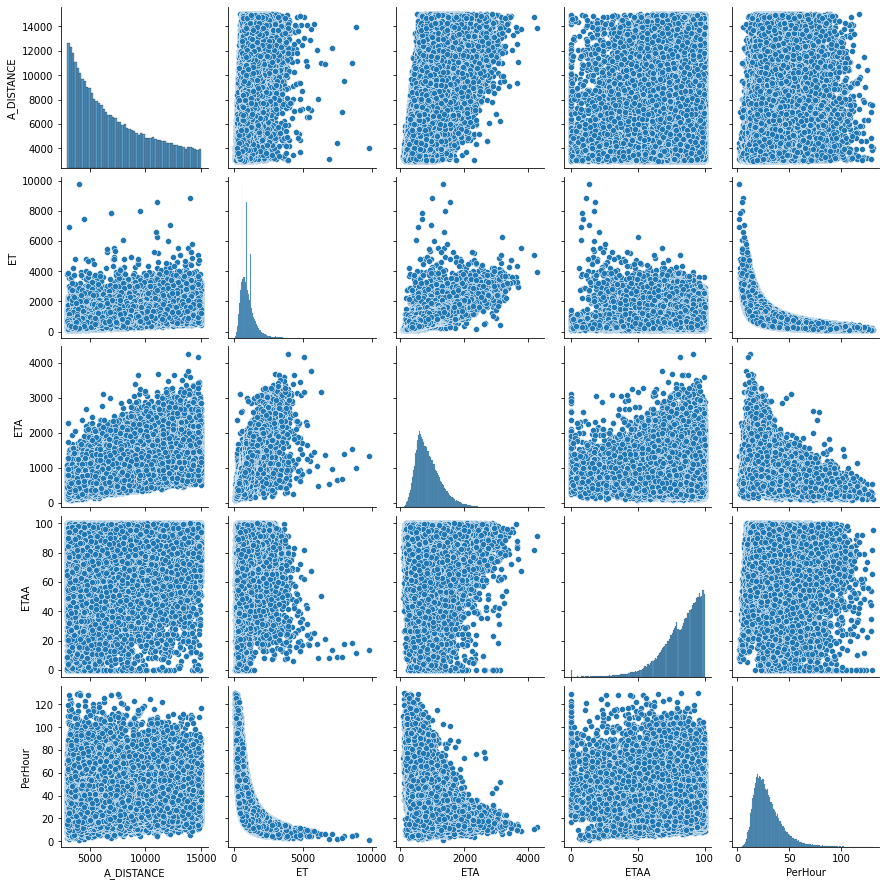

In [19]:
# 다시 한 번 확인해 보겠습니다.

sns.pairplot(df_total)
plt.show()

### 추가데이터를 합치고 확인해보겠습니다.

In [20]:
df_pnu = pd.read_csv("onenavi_pnu.csv",sep="|") # 주소(시도/시군구 정보)
df_signal = pd.read_csv("onenavi_signal.csv",sep="|") # 경로의 신호등 갯수

In [21]:
df_total=pd.merge(df_total,df_pnu , on="RID")
df_total=pd.merge(df_total,df_signal , on="RID")
df_total

,RID,TIME_DEPARTUREDATE,TIME_ARRIVEDATE,A_DISTANCE,ET,ETA,ETAA,PerHour,level1_pnu,level2_pnu,signaltype
0,router-84875df7fc-b5nxc-7-20255166-0,2020-07-20 05:35:21.000,2020-07-20 05:55:22.599,12914.0,1201.534058,987.624634,82.196974,38.692536,경기도,광명시,7.0
1,router-84875df7fc-b5nxc-6-10888379-0,2020-07-20 05:55:22.000,2020-07-20 06:09:06.941,7483.0,823.817017,855.933716,96.101477,32.699980,서울특별시,영등포구,31.0
2,router-84875df7fc-cmkz9-7-45806143-0,2020-07-20 00:13:46.000,2020-07-20 00:22:32.909,8087.0,526.710999,575.954529,90.650750,55.273575,경기도,김포시,6.0
3,router-84875df7fc-scxcj-7-47843617-0,2020-07-20 00:13:43.000,2020-07-20 00:28:42.729,10528.0,898.581970,537.117004,59.773846,42.178456,경기도,광주시,2.0
4,router-84875df7fc-scxcj-3-20061505-0,2020-07-20 00:01:57.000,2020-07-20 00:17:58.169,10636.0,957.758972,786.352539,82.103385,39.978326,경기도,안산시 상록구,28.0
...,...,...,...,...,...,...,...,...,...,...,...
109264,router-84875df7fc-b5nxc-0-6856031-0,2020-07-31 11:09:24.000,2020-07-31 11:15:59.833,4457.0,393.873993,633.093689,39.264917,40.736886,경기도,용인시 처인구,21.0
109265,router-84875df7fc-cmkz9-7-71080475-0,2020-07-31 11:09:25.000,2020-07-31 11:17:26.427,5518.0,478.945007,377.083557,78.732120,41.476161,서울특별시,광진구,0.0
109266,router-84875df7fc-cmkz9-7-71082304-0,2020-07-31 11:10:04.000,2020-07-31 11:14:01.092,4025.0,223.481995,412.308411,15.507101,64.837438,경기도,연천군,2.0
109267,router-84875df7fc-b5nxc-4-75603454-0,2020-07-31 11:11:46.000,2020-07-31 11:17:47.095,3372.0,360.329010,580.275146,38.959637,33.689211,경기도,성남시 분당구,10.0


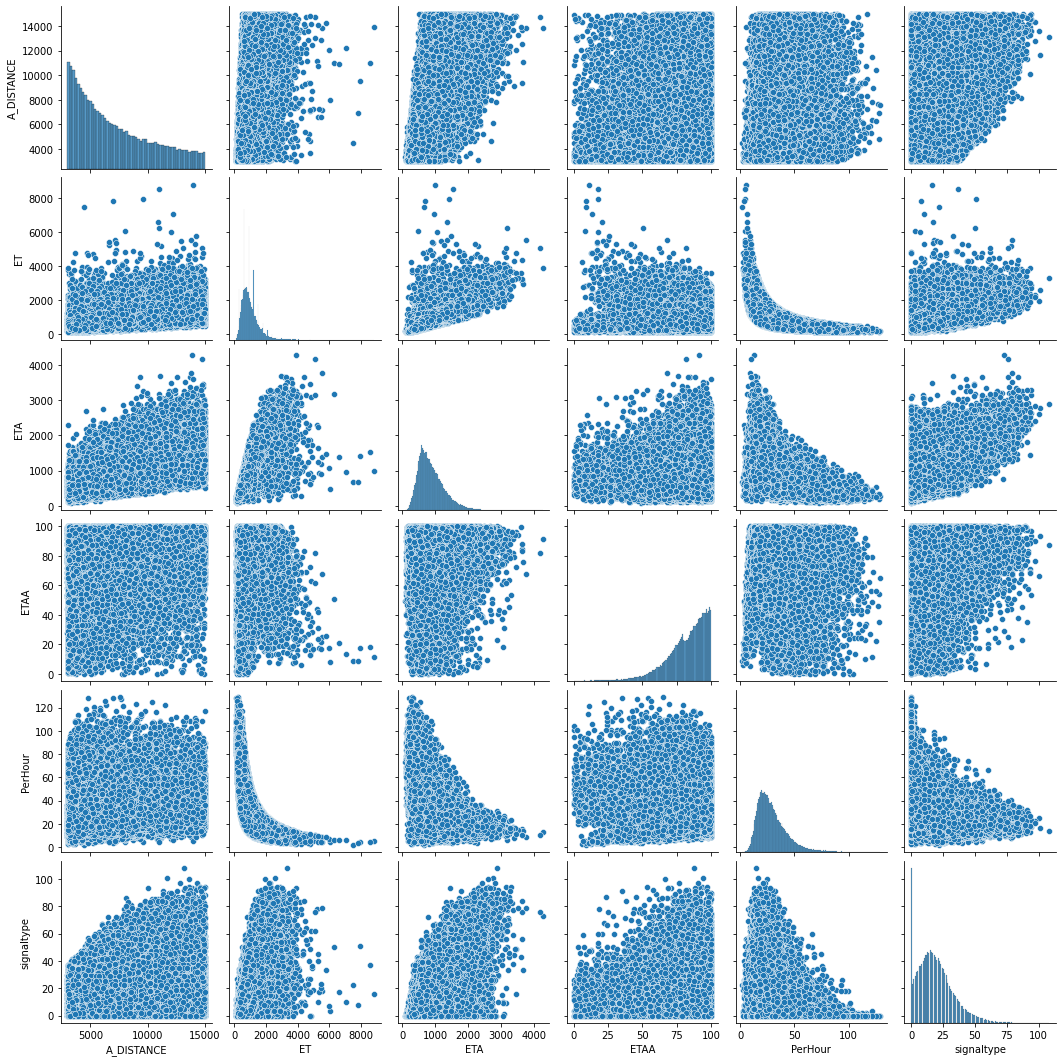

In [22]:
# 다시 한 번 확인해 보겠습니다.

sns.pairplot(df_total)
plt.show()

#### [참고] AIDU에서는 파일을 불러올 때 아래 예시를 참고 : 아래 코드는 AIDU에서만 실행 가능합니다.

In [23]:
# # 추가 데이터 셋 로딩
# df_pnu = pd.read_csv(aidu_framework.config.data_dir + "onenavi_pnu.csv",sep="|") # 주소(시도/시군구 정보)
# df_signal = pd.read_csv(aidu_framework.config.data_dir + "onenavi_signal.csv",sep="|") # 경로의 신호등 갯수
# # 데이터 합치기
# df_total=pd.merge(df_total,df_pnu , on="RID")
# df_total=pd.merge(df_total,df_signal , on="RID")
# df_total

In [24]:
# 다시 한 번 확인해 보겠습니다.

# sns.pairplot(df_total)
# plt.show()

#### 자, 결측치, 이상치 처리에 있어 우리는 한가지 놓친 것이 있습니다. 데이터 셋 정의를 확인해볼까요?
#### 우리 데이터는 수도권으로 한정되어있다고 정의했었죠?

In [25]:
df_total['level1_pnu'].unique()

array(['경기도', '서울특별시', '인천광역시', '-', '충청북도', '강원도', '충청남도'], dtype=object)

In [26]:
# 서울/경기/인천으로 데이터 정제
df_total=df_total[(df_total['level1_pnu']=='서울특별시')|(df_total['level1_pnu']=='경기도')|(df_total['level1_pnu']=='인천광역시')]
df_total=df_total.reset_index(drop=True)
df_total

,RID,TIME_DEPARTUREDATE,TIME_ARRIVEDATE,A_DISTANCE,ET,ETA,ETAA,PerHour,level1_pnu,level2_pnu,signaltype
0,router-84875df7fc-b5nxc-7-20255166-0,2020-07-20 05:35:21.000,2020-07-20 05:55:22.599,12914.0,1201.534058,987.624634,82.196974,38.692536,경기도,광명시,7.0
1,router-84875df7fc-b5nxc-6-10888379-0,2020-07-20 05:55:22.000,2020-07-20 06:09:06.941,7483.0,823.817017,855.933716,96.101477,32.699980,서울특별시,영등포구,31.0
2,router-84875df7fc-cmkz9-7-45806143-0,2020-07-20 00:13:46.000,2020-07-20 00:22:32.909,8087.0,526.710999,575.954529,90.650750,55.273575,경기도,김포시,6.0
3,router-84875df7fc-scxcj-7-47843617-0,2020-07-20 00:13:43.000,2020-07-20 00:28:42.729,10528.0,898.581970,537.117004,59.773846,42.178456,경기도,광주시,2.0
4,router-84875df7fc-scxcj-3-20061505-0,2020-07-20 00:01:57.000,2020-07-20 00:17:58.169,10636.0,957.758972,786.352539,82.103385,39.978326,경기도,안산시 상록구,28.0
...,...,...,...,...,...,...,...,...,...,...,...
109170,router-84875df7fc-b5nxc-0-6856031-0,2020-07-31 11:09:24.000,2020-07-31 11:15:59.833,4457.0,393.873993,633.093689,39.264917,40.736886,경기도,용인시 처인구,21.0
109171,router-84875df7fc-cmkz9-7-71080475-0,2020-07-31 11:09:25.000,2020-07-31 11:17:26.427,5518.0,478.945007,377.083557,78.732120,41.476161,서울특별시,광진구,0.0
109172,router-84875df7fc-cmkz9-7-71082304-0,2020-07-31 11:10:04.000,2020-07-31 11:14:01.092,4025.0,223.481995,412.308411,15.507101,64.837438,경기도,연천군,2.0
109173,router-84875df7fc-b5nxc-4-75603454-0,2020-07-31 11:11:46.000,2020-07-31 11:17:47.095,3372.0,360.329010,580.275146,38.959637,33.689211,경기도,성남시 분당구,10.0


# 3. 더미변수 생성
## 범주형 데이터도 모델링에 활용할 수 있어야 합니다. 이를 위해 더미변수로 변환해주어야 합니다.
+ KeyPoint : 범주형 변수를 더미변수로 변환할 수 있다.

#### 범주형 변수 중에 어떤 변수를 더미로 변환해볼까요?
#### 요일, 시간, 시도 변수를 더미화 하면 좋을 것 같습니다.

In [27]:
# 진행상황을 체크할 수 있는 라이브러리
!pip install tqdm

In [28]:
# 요일, 시간 변수 추가
import datetime
from dateutil.parser import parse
from tqdm import tqdm

weekday_list=[]
hour_list=[]
day_list=[]

for w in tqdm(df_total['TIME_DEPARTUREDATE']):
    parse_data_w=parse(w)
    weekday_list.append(parse_data_w.weekday())
    hour_list.append(parse_data_w.hour)
    day_list.append(parse_data_w.day)
    
df_total['WEEKDAY'] = weekday_list
df_total['HOUR'] = hour_list
df_total['DAY'] = day_list

100%|██████████| 109175/109175 [00:06<00:00, 17661.49it/s]


In [29]:
# 평가데이터 별도 저장 : 원본 기준(나중에 활용)
new_df_eval=df_total[df_total['DAY']>=27]
new_df_eval.to_csv("onenavi_evaluation_new.csv",sep="|",index=False)

In [30]:
dummy_fields = ['WEEKDAY','HOUR','level1_pnu','level2_pnu']

for dummy in dummy_fields:
    dummies = pd.get_dummies(df_total[dummy], prefix=dummy, drop_first=False)
    df_total = pd.concat([df_total, dummies], axis=1)
    
df_total = df_total.drop(dummy_fields,axis=1)

# 4. 데이터 스케일링
##  Feature들의 크기, 범주를 정규화하는 과정을 통해 특정변수의 영향도를 조정해줄 수 있습니다.
+ KeyPoint : 데이터 스케일링을 통해 AI모델 학습에 도움을 줄 수 있다.

In [31]:
# 기준일자 저장 : why? 날짜가 스케일링이 되면 안됩니다.
data_day=df_total['DAY']

In [32]:
train_data=df_total.drop(['RID','TIME_DEPARTUREDATE','TIME_ARRIVEDATE','ET','ETAA','PerHour','DAY'],axis=1)
columnNames=train_data.columns
train_data

,A_DISTANCE,ETA,signaltype,WEEKDAY_0,WEEKDAY_1,WEEKDAY_2,WEEKDAY_3,WEEKDAY_4,HOUR_0,HOUR_1,...,level2_pnu_의정부시,level2_pnu_이천시,level2_pnu_종로구,level2_pnu_중구,level2_pnu_중랑구,level2_pnu_파주시,level2_pnu_평택시,level2_pnu_포천시,level2_pnu_하남시,level2_pnu_화성시
0,12914.0,987.624634,7.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7483.0,855.933716,31.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8087.0,575.954529,6.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,10528.0,537.117004,2.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,10636.0,786.352539,28.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109170,4457.0,633.093689,21.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
109171,5518.0,377.083557,0.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
109172,4025.0,412.308411,2.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
109173,3372.0,580.275146,10.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
# 스케일링
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
feature = pd.DataFrame(scaler.fit_transform(train_data))
feature.columns=columnNames
feature

,A_DISTANCE,ETA,signaltype,WEEKDAY_0,WEEKDAY_1,WEEKDAY_2,WEEKDAY_3,WEEKDAY_4,HOUR_0,HOUR_1,...,level2_pnu_의정부시,level2_pnu_이천시,level2_pnu_종로구,level2_pnu_중구,level2_pnu_중랑구,level2_pnu_파주시,level2_pnu_평택시,level2_pnu_포천시,level2_pnu_하남시,level2_pnu_화성시
0,0.826167,0.216722,0.064815,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.373583,0.185241,0.287037,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.423917,0.118311,0.055556,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.627333,0.109026,0.018519,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.636333,0.168607,0.259259,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109170,0.121417,0.131970,0.194444,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
109171,0.209833,0.070770,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
109172,0.085417,0.079190,0.018519,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
109173,0.031000,0.119343,0.092593,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
# 다시 날짜를 합칠께요 : Train/Evaluation 분리를 위해 
feature['DAY']=data_day
# traindata 지정
train_feature=feature[feature['DAY']<=24]
train_feature=train_feature.drop(['DAY'],axis=1)
eval_feature=feature[feature['DAY']>=27]
eval_feature=eval_feature.drop(['DAY'],axis=1)

In [35]:
len(feature),len(train_feature),len(eval_feature)

(109175, 55433, 53742)

In [36]:
# target 저장
train_target = df_total[df_total['DAY']<=24]['ET']
train_target

0        1201.534058
1         823.817017
2         526.710999
3         898.581970
4         957.758972
            ...     
55428     544.301025
55429     535.666992
55430     610.799988
55431     878.479004
55432     553.580994
Name: ET, Length: 55433, dtype: float64

In [37]:
# CSV로 저장
train_feature.to_csv('onenavi_train_feature.csv',index = False,sep='|')
train_target.to_csv('onenavi_train_target.csv',index = False,sep='|')
eval_feature.to_csv('onenavi_eval_feature.csv',index = False,sep='|')